In [50]:
# CLASE 1

# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

In [51]:
# 2 - CARGA DEL FICHERO DE DATOS
file = '/content/drive/MyDrive/Colab Notebooks4/M4_Aprendizaje _supervisado_1/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [52]:
# 2 - CARGA DEL FICHERO DE DATOS
#file ='/content/drive/MyDrive/Colab Notebooks4/Aprendizaje _supervisado_1/ASI_casoPractico.csv'
#data = pd.read_csv(file, sep = ';')
#data.head()

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# 2 - INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [55]:
# 2 - NUMERO DE VALORES UNICOS PARA CADA VARIABLE
data.agg(['nunique']).T

,nunique
ID,2126
b,979
e,1064
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87


In [56]:
# 2 -ELIMINAR COUMNAS NO NECESARIAS
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [57]:
# 3 - ANALISIS DESCRIPTIVO - NULOS
data.isnull().sum()

,0
LBE,0
AC,0
FM,0
UC,0
ASTV,0
MSTV,0
ALTV,0
MLTV,0
DL,0
DS,0


In [58]:
# 3 - MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERION
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


Target
0    1655
1     471
Name: count, dtype: int64


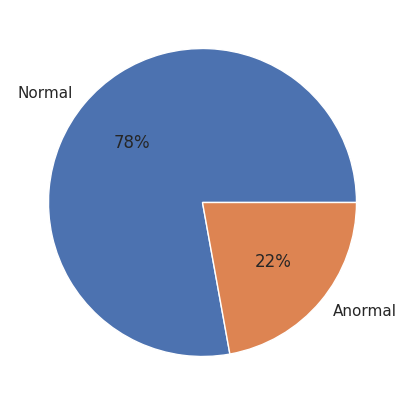

In [59]:
# 3 - DISTRIBUCION DE FRECUENCIAS DEL TARGET
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

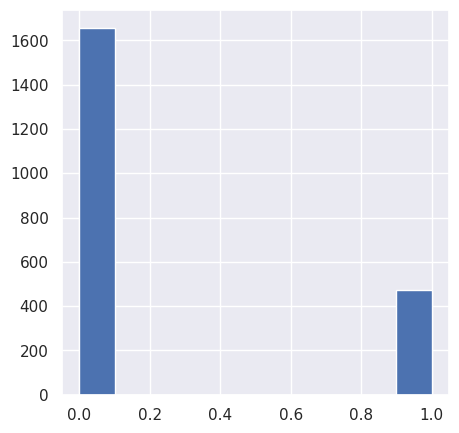

In [60]:
# 3 - HISTOGRAMA

# Crear una figura y ejes para el histograma
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Aplicar el estilo Seaborn
import seaborn as sns
sns.set_theme()

# Graficar el histograma de la columna 'Target'
data['Target'].hist(ax=ax)

# Mostrar el gráfico
plt.show()

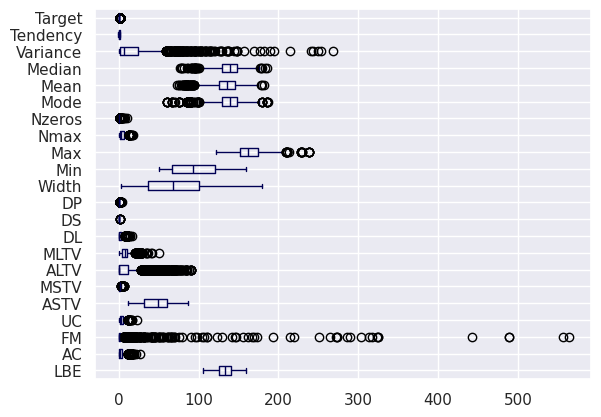

In [61]:
# BOX PLOT
data_box_plot = data.boxplot(vert=False, color = "#000054")

<Axes: >

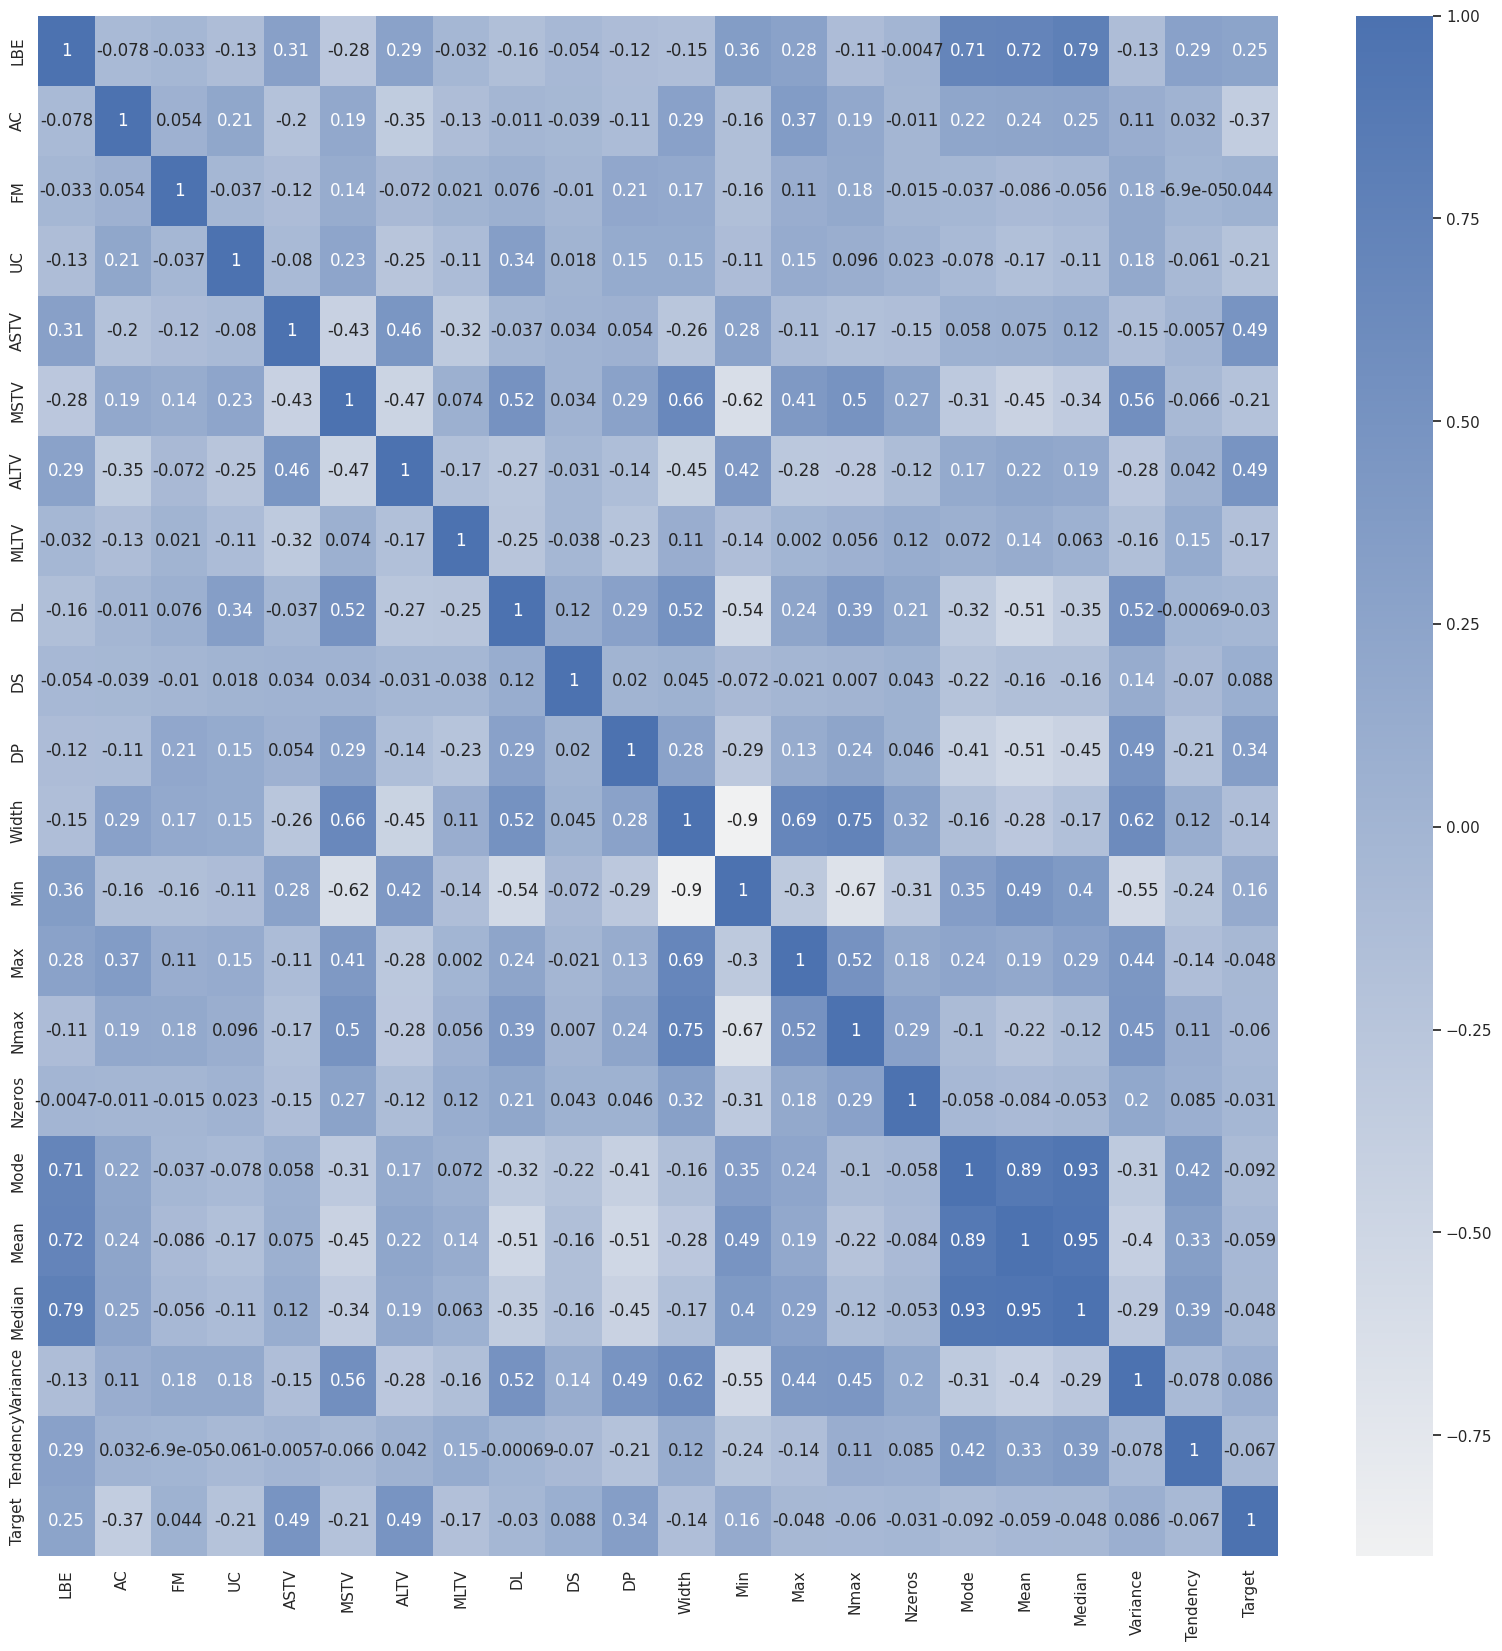

In [62]:
# CLASE 2

# 3 - MATRIZ DE CORRELACIONES
plt.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)


<ipython-input-63-4ae043880b89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Target', y= 'ASTV', data = data, palette="Blues")


Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

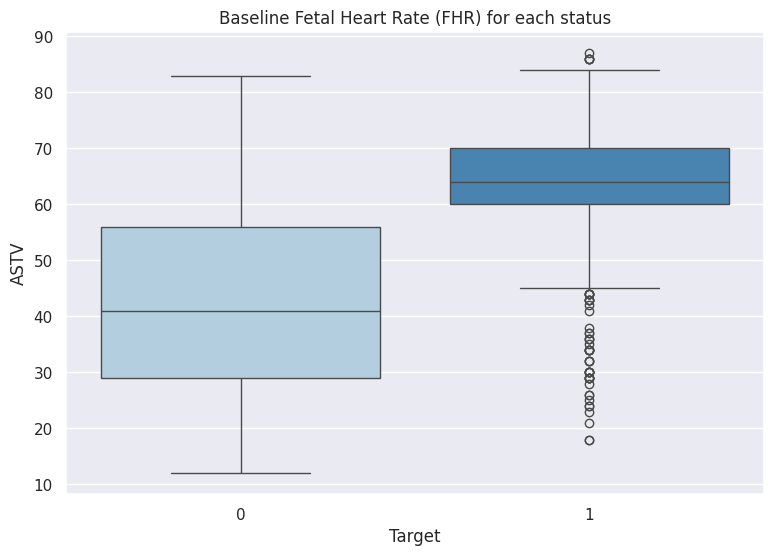

In [63]:
# 3 - RELACION UNIVARIANTE DEL TARGET CON LAS VARIABLES EXPLICATIVAS
plt.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'ASTV', data = data, palette="Blues")
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

In [64]:
# MUESTREO
# ENTRENAMIENTO Y TEST
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)







In [65]:
# MODELIZACION
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# PREDICCIONES
modelNB = gnb.fit(X_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(X_train)
y_pred_test = modelNB.predict_proba(X_test)




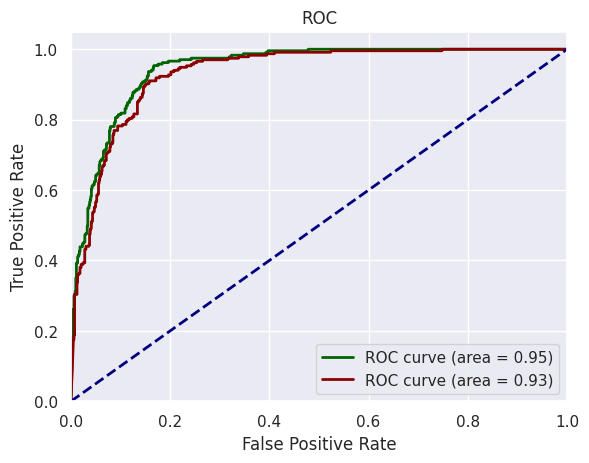

In [66]:
# # VALIDACION
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# CURVA ROC Y AUC PARA TRAINING
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# CURVA ROC Y AUC PARA TEST
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# GRAFICA
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()




In [67]:
# VALIDACION. CURVA ROC, AUC Y MATRIZ DE CONFUSION
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
"""
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_pred_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# CURVA ROC Y AUC PARA TEST
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_pred_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

"""

# CURVA ROC Y AUC PARA TRAINING
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# CURVA ROC Y AUC PARA TEST
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# **Solucion Sprint 2**

**1_Las tres variables explicativas que presentan mayor correlación con el target son:**

ASTV con una correlación de 0.493391
ALTV con una correlación de 0.489400
DP con una correlación de 0.340647 ​

In [68]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

In [69]:

# Obtener la correlación con el target
target_correlation = correlation_matrix["Target"].sort_values(ascending=False)

In [70]:
# Obtener las 3 variables explicativas con mayor correlación con el target
top_3_correlated_variables = target_correlation.index[1:4]

top_3_correlated_variables, target_correlation[top_3_correlated_variables]

(Index(['ASTV', 'ALTV', 'DP'], dtype='object'),
 ASTV    0.493391
 ALTV    0.489400
 DP      0.340647
 Name: Target, dtype: float64)

**2_Cree un conjunto de entrenamiento y otro de test a partir del conjunto inicial de datos donde el conjunto de entrenamiento contenga el 60% de las observaciones.**



In [71]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y el target (y)
X = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

# Crear conjunto de entrenamiento y test con el 60% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

# Verificar los tamaños de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1275, 21), (851, 21), (1275, 1), (851, 1))

Conjunto de entrenamiento (60%): 1275 observaciones.
Conjunto de prueba (40%): 851 observaciones.

**3_A partir del conjunto de entrenamiento ajuste un modelo a partir del algoritmo de Naive Bayes.**

In [72]:
from sklearn.naive_bayes import GaussianNB

# Crear y ajustar el modelo de Naive Bayes con el conjunto de entrenamiento
gnb = GaussianNB()
modelNB = gnb.fit(X_train, y_train.values.ravel())

# Verificar el ajuste del modelo
modelNB

GaussianNB()

Evaluar el Modelo

In [73]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de prueba
y_pred_test = modelNB.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_test)
accuracy

0.8848413631022327

**4_Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test**

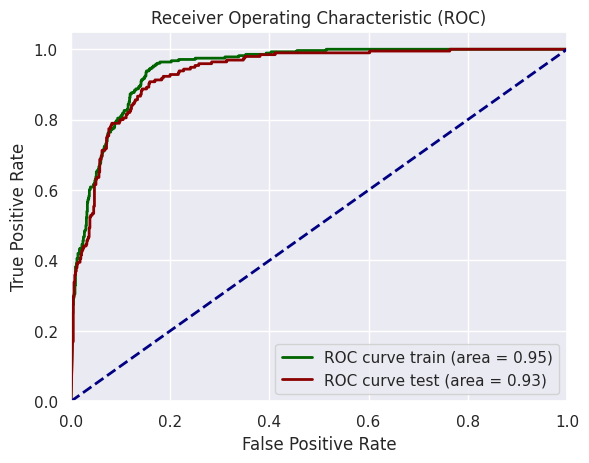

(0.9459296252774514, 0.9349046278924328)

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para el conjunto de entrenamiento y prueba
y_pred_train_proba = modelNB.predict_proba(X_train)[:, 1]
y_pred_test_proba = modelNB.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC) para el conjunto de entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calcular la curva ROC y el área bajo la curva (AUC) para el conjunto de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Graficar la curva ROC
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color="darkgreen", lw=lw, label="ROC curve train (area = %0.2f)" % roc_auc_train)
plt.plot(fpr_test, tpr_test, color="darkred", lw=lw, label="ROC curve test (area = %0.2f)" % roc_auc_test)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

roc_auc_train, roc_auc_test

Área bajo la curva (AUC) para el conjunto de entrenamiento: 0.946
Área bajo la curva (AUC) para el conjunto de prueba: 0.935

**Evaluación del rendimiento:**

AUC para el conjunto de entrenamiento (0.946): Un AUC de 0.946 sugiere que el modelo tiene un excelente rendimiento en el conjunto de entrenamiento. Esto indica que el modelo es capaz de discriminar muy bien entre las clases (normal y anormal) en los datos con los que fue entrenado.

AUC para el conjunto de prueba (0.935): Un AUC de 0.935 en el conjunto de prueba también indica un excelente rendimiento del modelo. Este valor, ligeramente inferior al AUC del conjunto de entrenamiento, sugiere que el modelo generaliza bien a datos no vistos, manteniendo una alta capacidad de discriminación.